<h1 align="center" style="color: #87CEEB;">Customer-Churn-Prediction-using-ANN<h1>

In [19]:
import pandas as pd

In [20]:
df=pd.read_csv("archive\Churn_Modelling.csv")

In [21]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
df.duplicated().sum()

0

In [24]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [25]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [28]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True,dtype=int)

In [29]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [30]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["Exited"])
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
from keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model=Sequential()

In [36]:
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss="binary_crossentropy",optimizer='Adam')

In [39]:
history_1=model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10

250/250 [==============================] - 1s 1ms/step - loss: 0.6034
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5072
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4688
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4507
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4411
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4352
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4314
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4288
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4268
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4253


In [40]:
model.layers[0].get_weights()

[array([[ 0.30002335, -0.3004785 , -0.05816986],
        [-0.23117582,  1.1838045 , -1.7538933 ],
        [ 0.10513977,  0.08582078,  0.07962301],
        [-0.30138117, -0.00358385, -0.42079952],
        [-0.10093448, -0.1321101 ,  0.01510209],
        [ 0.21793914,  0.49131742,  0.20746893],
        [ 1.1558211 , -0.41249916,  0.5177102 ],
        [ 0.28014508,  0.02763162, -0.09247486],
        [-0.53786844,  0.84128237, -0.25529405],
        [-0.1384735 , -0.16564001, -0.01694495],
        [ 0.6682588 , -0.76358247,  0.15343025]], dtype=float32),
 array([ 0.34375796, -0.42565006,  0.4575856 ], dtype=float32)]

In [41]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [42]:
import numpy as np
y_pred=np.where(y_log>0.5,1,0)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1585
           1       0.70      0.19      0.30       415

    accuracy                           0.81      2000
   macro avg       0.76      0.58      0.60      2000
weighted avg       0.80      0.81      0.77      2000



In [44]:
model2=Sequential()

In [45]:
X_train.shape

(8000, 11)

In [46]:
model2.add(Dense(6,input_dim=11,activation='relu'))

In [47]:
model2.add(Dense(3,activation='relu'))

In [48]:
model2.add(Dense(1,activation='sigmoid'))

In [49]:
model2.compile(loss="binary_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [50]:
history=model2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100

200/200 [==============================] - 1s 3ms/step - loss: 0.5088 - accuracy: 0.7905 - val_loss: 0.4773 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8027 - val_loss: 0.4526 - val_accuracy: 0.8012
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8127 - val_loss: 0.4389 - val_accuracy: 0.8131
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8206 - val_loss: 0.4297 - val_accuracy: 0.8219
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8214 - val_loss: 0.4242 - val_accuracy: 0.8244
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8225 - val_loss: 0.4203 - val_accuracy: 0.8263
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8269 - val_loss: 0.4158 - val_accuracy: 0.825

In [51]:
y_log_2=model2.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [52]:
y_pred_2=np.where(y_log_2>0.5,1,0)

In [53]:
y_pred_2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
print(classification_report(y_true=y_test,y_pred=y_pred_2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1585
           1       0.76      0.47      0.58       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



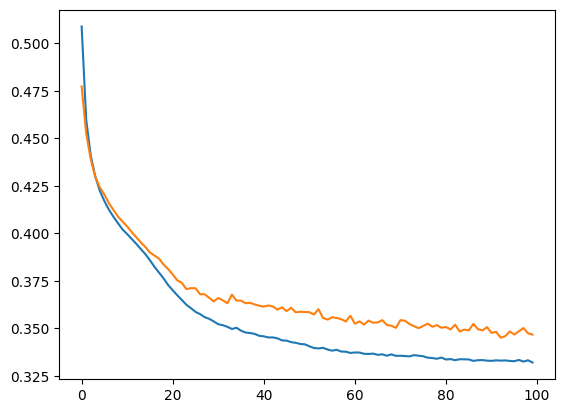

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

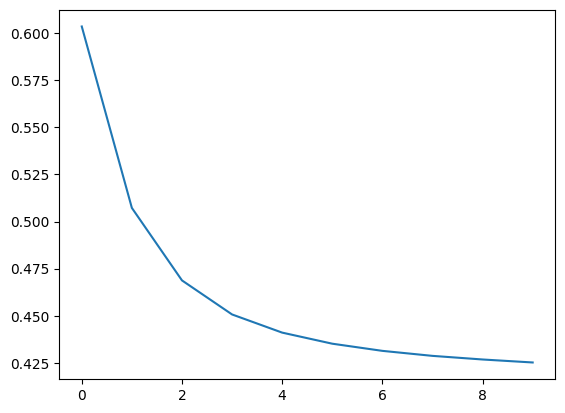

In [56]:
plt.plot(history_1.history['loss'])